In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('/content/commodity_price.csv')
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,19/05/2025,2200,3050,2850
1,Gujarat,Amreli,Savarkundla,Bengal Gram(Gram)(Whole),Average (Whole),Non-FAQ,19/05/2025,5305,5525,5390
2,Gujarat,Amreli,Savarkundla,Castor Seed,Castor seed,FAQ,19/05/2025,5500,5970,5750
3,Gujarat,Anand,Khambhat(Grain Market),Paddy(Dhan)(Common),Other,FAQ,19/05/2025,1700,2050,1900
4,Gujarat,Anand,Khambhat(Grain Market),Paddy(Dhan)(Common),Paddy,FAQ,19/05/2025,2500,3150,2900


In [4]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_x0020_Price', 'Max_x0020_Price',
       'Modal_x0020_Price'],
      dtype='object')

In [5]:
df.info()
# No null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              2733 non-null   object
 1   District           2733 non-null   object
 2   Market             2733 non-null   object
 3   Commodity          2733 non-null   object
 4   Variety            2733 non-null   object
 5   Grade              2733 non-null   object
 6   Arrival_Date       2733 non-null   object
 7   Min_x0020_Price    2733 non-null   int64 
 8   Max_x0020_Price    2733 non-null   int64 
 9   Modal_x0020_Price  2733 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 213.6+ KB


In [6]:
df.describe()

,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
count,2733.000000,2733.000000,2733.000000
mean,3237.640322,3794.893524,3527.580681
std,3779.595426,4273.064563,3982.882399
min,0.000000,0.000000,200.000000
25%,1200.000000,1500.000000,1400.000000
50%,2350.000000,2700.000000,2500.000000
75%,4000.000000,4880.000000,4400.000000
max,70000.000000,90000.000000,80000.000000


## EDA

/tmp/ipython-input-3803070612.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])


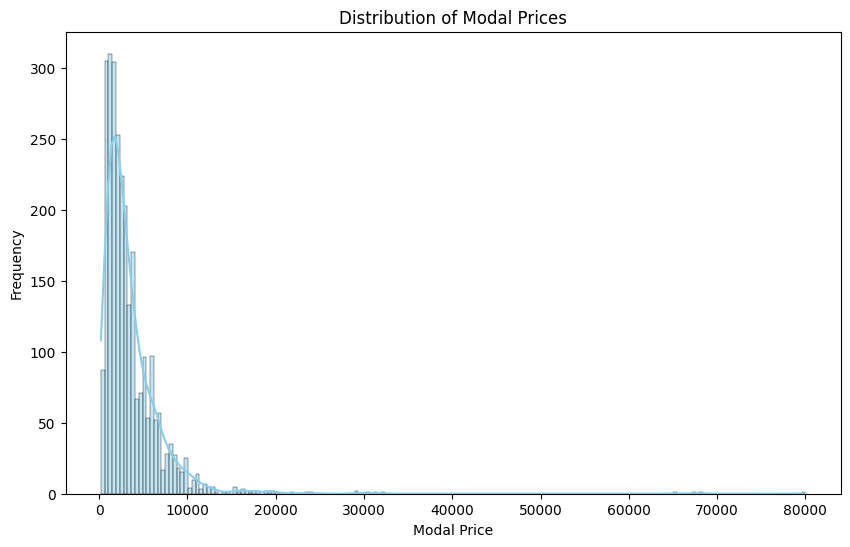

In [7]:
# convert the Arrival_Date datatype to datetime datatype
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])

# Extract Month from Arrival_Date
df['Month'] = df['Arrival_Date'].dt.month

plt.figure(figsize=(10, 6))
sns.histplot(df['Modal_x0020_Price'], kde=True, color='skyblue')
plt.title('Distribution of Modal Prices')
plt.xlabel('Modal Price')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-1601613152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Commodity'].isin(top_commodities)],


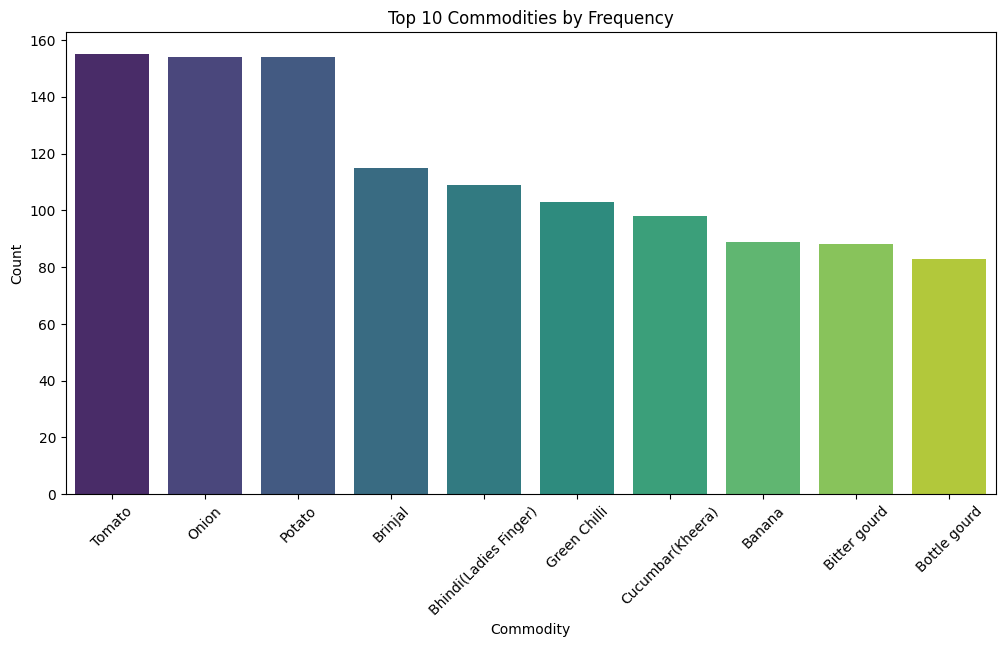

In [8]:
# 2. Count plot for top 10 commodities by frequency
plt.figure(figsize=(12, 6))
top_commodities = df['Commodity'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Commodity'].isin(top_commodities)],
              x='Commodity', order=top_commodities, palette='viridis')
plt.title('Top 10 Commodities by Frequency')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Commodity')
plt.show()

/tmp/ipython-input-1384348608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Modal_x0020_Price', data=df, palette='Set2')


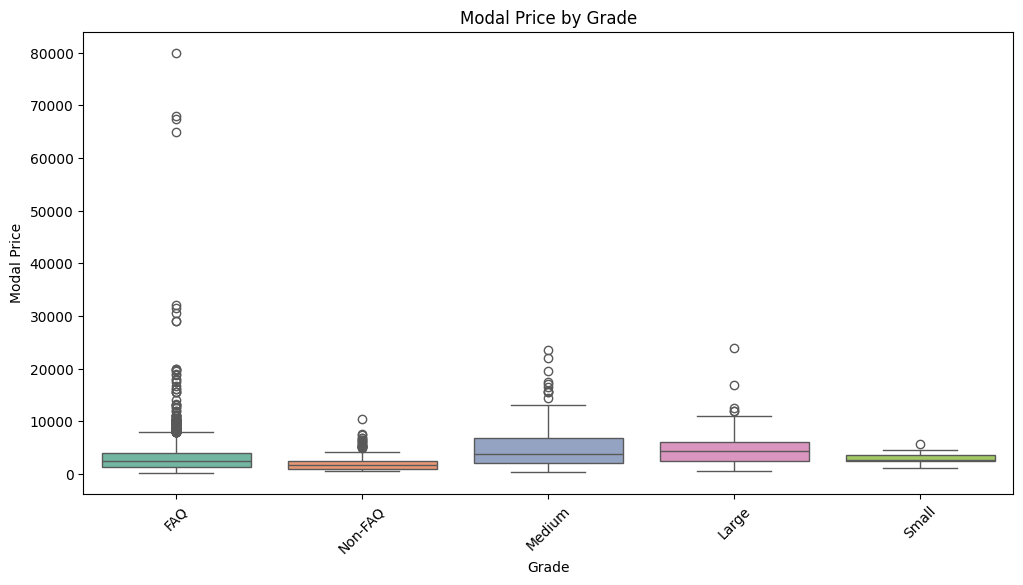

In [9]:
# 3. Box Plot for Modal Price across different Grades
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grade', y='Modal_x0020_Price', data=df, palette='Set2')
plt.title('Modal Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Modal Price')
plt.xticks(rotation=45)
plt.show()

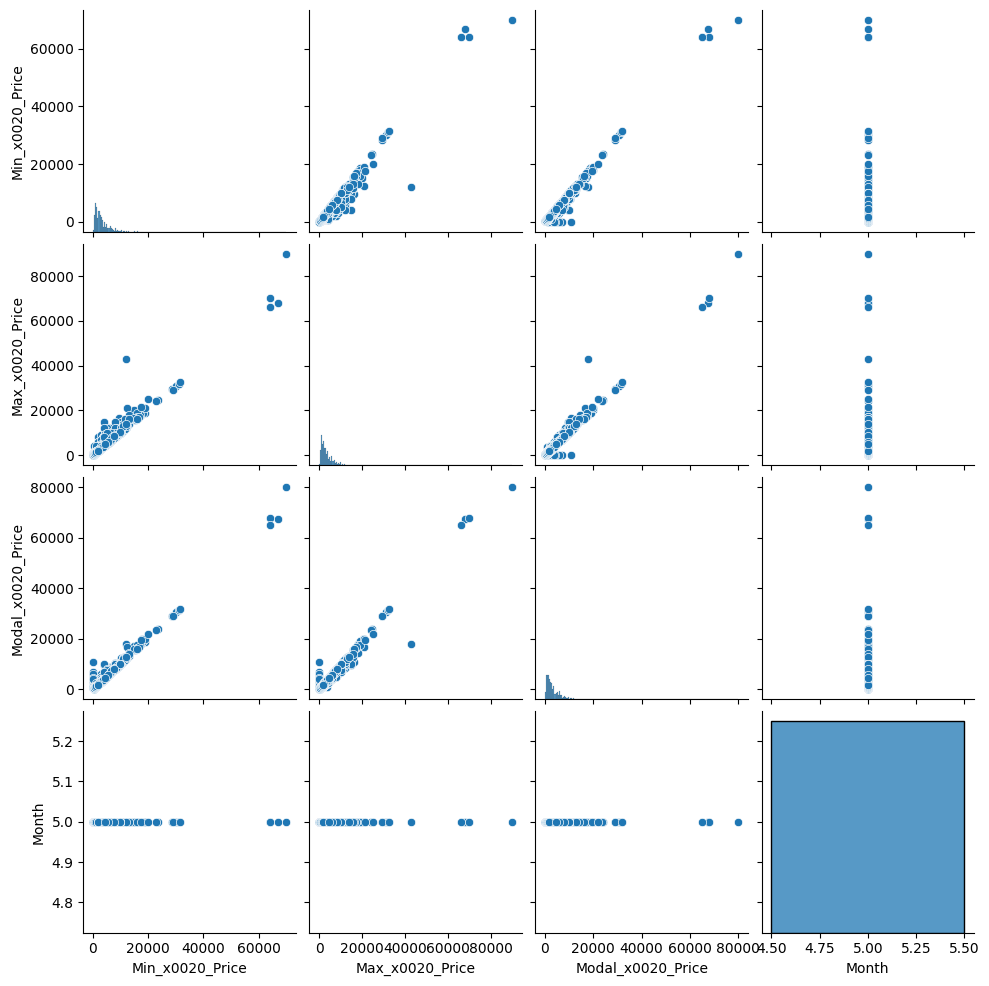

In [10]:
# 4. Pair Plot of numeric columns if 4 or more exist
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    sns.pairplot(numeric_df)
    plt.show()
else:
    print('Not enough numeric columns for a pair plot. Skipping this step.')

/tmp/ipython-input-1514845322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Modal_x0020_Price', data=avg_price_by_month, palette='magma')


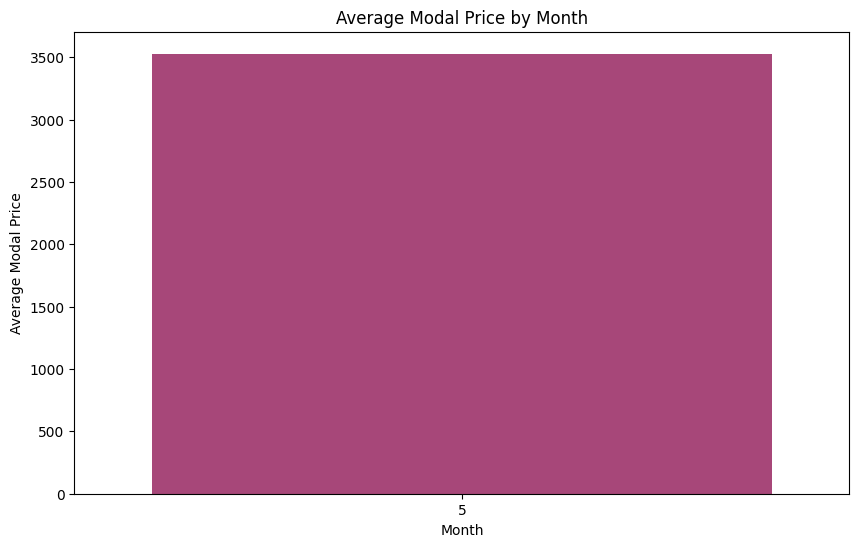

In [11]:
# 5. Bar plot of average Modal Price by Month
plt.figure(figsize=(10, 6))
avg_price_by_month = df.groupby('Month')['Modal_x0020_Price'].mean().reset_index()
sns.barplot(x='Month', y='Modal_x0020_Price', data=avg_price_by_month, palette='magma')
plt.title('Average Modal Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Modal Price')
plt.show()

<Axes: xlabel='Modal_x0020_Price'>

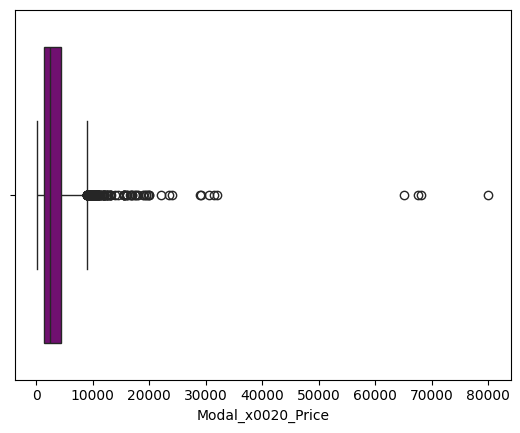

In [12]:
sns.boxplot(x=df["Modal_x0020_Price"], color='Purple')

In [14]:
# checking the outliers
Q1 = df['Max_x0020_Price'].quantile(0.25)
Q3 = df['Max_x0020_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Max_x0020_Price'] < lower_bound) | (df['Max_x0020_Price'] > upper_bound)]

print(lower_bound)
print(upper_bound)
print(outliers)

-3570.0
9950.0
                 State       District            Market  \
22             Gujarat  Surendranagar       Dhragradhra   
76             Haryana        Sonipat            Ganaur   
103   Himachal Pradesh         Kangra            Kangra   
106   Himachal Pradesh         Kangra            Kangra   
108   Himachal Pradesh         Kangra  Kangra(Baijnath)   
...                ...            ...               ...   
2551         Rajasthan         Jaipur      Jaipur (F&V)   
2589           Tripura         Gomati        Nutanbazar   
2606     Uttar Pradesh         Amroha            Amroha   
2662     Uttar Pradesh       Mainpuri           Ghiraur   
2694     Uttar Pradesh        Sitapur           Sitapur   

                     Commodity             Variety   Grade Arrival_Date  \
22          Cummin Seed(Jeera)  Cummin Seed(Jeera)     FAQ   2025-05-19   
76                       Lemon               Lemon     FAQ   2025-05-19   
103                     Grapes               Other 

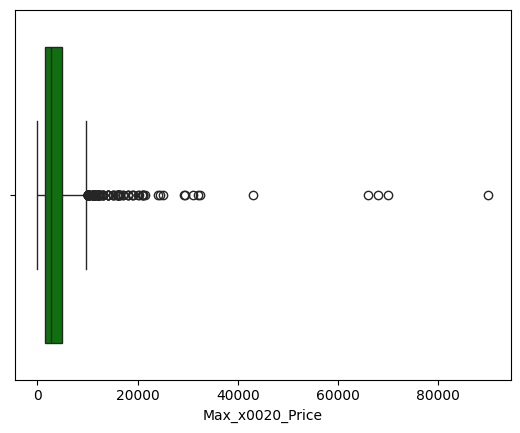

In [15]:
# Box plot for outliers detection
sns.boxplot(x=df['Max_x0020_Price'], color='Green')
plt.show()

<Axes: xlabel='Min_x0020_Price'>

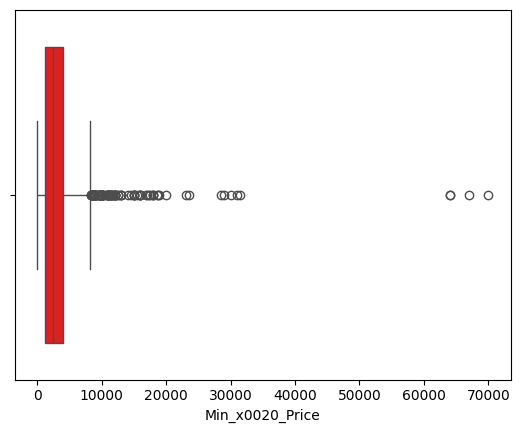

In [17]:
sns.boxplot(x=df['Min_x0020_Price'], color='red')

<Axes: xlabel='Modal_x0020_Price'>

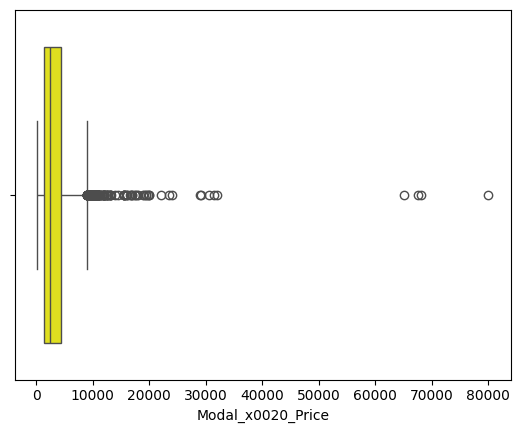

In [18]:
sns.boxplot(x=df['Modal_x0020_Price'], color='yellow')

* Removing the outliers using IQR Method

In [19]:
price_cols = ['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']

for col in price_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

* Removing outliers using Boxplot

In [20]:
for col in price_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

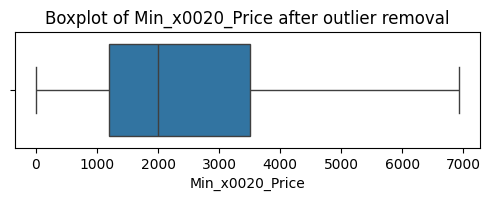

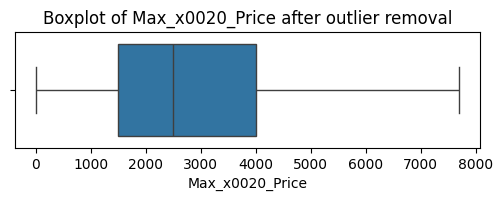

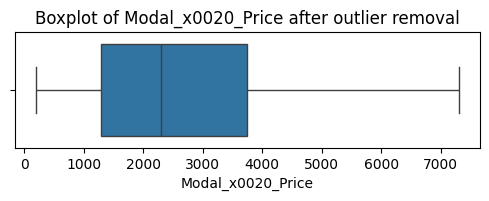

In [21]:
for col in price_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()

* Label Encoding the categorical Features

In [22]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df.copy()

In [23]:
cat_cols=['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

In [24]:
le=LabelEncoder()
for col in cat_cols:
  df_encoded[col]=le.fit_transform(df_encoded[col])

In [25]:
df_encoded[col]

,Grade
0,0
1,3
2,0
3,0
4,0
...,...
2728,0
2729,0
2730,0
2731,0


In [26]:
# Convert Arrival_Date to Date Parts
df_encoded['Arrival_Date'] = pd.to_datetime(df_encoded['Arrival_Date'])
df_encoded['Year'] = df_encoded['Arrival_Date'].dt.year
df_encoded['Month'] = df_encoded['Arrival_Date'].dt.month
df_encoded['Day'] = df_encoded['Arrival_Date'].dt.day
df_encoded.drop(columns='Arrival_Date', inplace=True)

In [27]:
df_encoded['Day']

,Day
0,19
1,19
2,19
3,19
4,19
...,...
2728,19
2729,19
2730,19
2731,19


In [28]:
# Define the features and target
features = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Year', 'Month', 'Day']
target = 'Modal_x0020_Price'

In [29]:
features

['State',
 'District',
 'Market',
 'Commodity',
 'Variety',
 'Grade',
 'Year',
 'Month',
 'Day']

* Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ML models

* 1. Linear Regression MOdels

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [34]:
y_pred=lr.predict(X_test)
print('R2_score :',r2_score(y_test,y_pred))

R2_score : 0.0699256336798989


* 2. XGBoost Algorithm

In [38]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 200, learning_rate=0.1, max_depth = 6, random_state=42)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
y_pred=xgb.predict(X_test)
print('R2_score :',r2_score(y_test,y_pred))

R2_score : 0.709453821182251


* LightGBM Regressor

In [40]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

lgbm=LGBMRegressor(n_estimators=200,learning_rate=0.1,max_depth=6,random_state=42)
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 1969, number of used features: 6
[LightGBM] [Info] Start training from score 2660.531742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(max_depth=6, n_estimators=200, random_state=42)

In [41]:
accuracy=r2_score(y_test,y_pred)
print('R2_score :',accuracy)

R2_score : 0.709453821182251


* Random Forest regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred=rf.predict(X_test)
print('R2_score :',r2_score(y_test,y_pred))

R2_score : 0.6652073836097327


* CatBoost Regressor

In [45]:
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [47]:
catbg=CatBoostRegressor(iterations=200,learning_rate=0.1,depth=6,random_state=4)
catbg.fit(X_train,y_train)

y_pred=catbg.predict(X_test)
print('R2_score :',r2_score(y_test,y_pred))

0:	learn: 1606.5489955	total: 3.87ms	remaining: 770ms
1:	learn: 1578.7426301	total: 5.59ms	remaining: 554ms
2:	learn: 1547.1075962	total: 9.54ms	remaining: 626ms
3:	learn: 1523.3315465	total: 13.1ms	remaining: 640ms
4:	learn: 1495.3923884	total: 16.9ms	remaining: 657ms
5:	learn: 1473.5018292	total: 20.4ms	remaining: 659ms
6:	learn: 1454.5716927	total: 24.3ms	remaining: 669ms
7:	learn: 1441.1760109	total: 27.7ms	remaining: 664ms
8:	learn: 1422.0205723	total: 32.3ms	remaining: 686ms
9:	learn: 1405.8309058	total: 34ms	remaining: 646ms
10:	learn: 1391.5493503	total: 38.5ms	remaining: 662ms
11:	learn: 1381.1748704	total: 41.3ms	remaining: 648ms
12:	learn: 1370.1249897	total: 45.2ms	remaining: 650ms
13:	learn: 1360.2511827	total: 48.6ms	remaining: 646ms
14:	learn: 1348.5021684	total: 52.5ms	remaining: 648ms
15:	learn: 1339.8442570	total: 55.9ms	remaining: 643ms
16:	learn: 1332.3153560	total: 59.9ms	remaining: 645ms
17:	learn: 1328.4732002	total: 63.1ms	remaining: 638ms
18:	learn: 1323.865595